<h1><center>CSCI - 6409 - The Process of Data Science - Fall 2022</h1></center>
<h1><center>Assignment 4</h1></center>

<b>Akshay Sharma</b>  
B00925863  


<b>Mayuri Chilekar</b>  
B00925385

### 1. Data Understanding<a id='top'></a>

#### a) Build Data Quality Report

In [68]:
#importing libraries
import pandas as pd
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import re
from nltk.probability import FreqDist
import itertools
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/Dalhousie_MDI/process_of_ds/assignment_4/wiki_movie_plots_deduped.csv")

Mounted at /content/drive


In [3]:
#imporing ntlk dependencies for preprocessing
nltk.download('popular')
nltk.download("book")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

####Creating metrics for Data Quality Report

In [5]:
print(df.head(10)) #Exploring Data
print(df.iloc[0]) # Viewing first row of our dataset

   Release Year                             Title Origin/Ethnicity  \
0          1901            Kansas Saloon Smashers         American   
1          1901     Love by the Light of the Moon         American   
2          1901           The Martyred Presidents         American   
3          1901  Terrible Teddy, the Grizzly King         American   
4          1902            Jack and the Beanstalk         American   
5          1903               Alice in Wonderland         American   
6          1903           The Great Train Robbery         American   
7          1904                   The Suburbanite         American   
8          1905          The Little Train Robbery         American   
9          1905        The Night Before Christmas         American   

                             Director       Cast    Genre  \
0                             Unknown        NaN  unknown   
1                             Unknown        NaN  unknown   
2                             Unknown        N

In [6]:
#Checking for null values in the dataset
df=df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  Int64 
 1   Title             34886 non-null  string
 2   Origin/Ethnicity  34886 non-null  string
 3   Director          34886 non-null  string
 4   Cast              33464 non-null  string
 5   Genre             34886 non-null  string
 6   Wiki Page         34886 non-null  string
 7   Plot              34886 non-null  string
dtypes: Int64(1), string(7)
memory usage: 2.2 MB


In [7]:
df.describe() # Since our dataset has only one numerical variable so the describe would give the data quality measure for the release year,
              # So we need to define other metrics to assess the data quality

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


####Since our focus is on using plot for creating the feature for the descriptive models, so we will be creating different metrics to assess the quality for the plot variable of our dataset

In [8]:
# Checking the average number of words in the plot column
avg_num_words = np.mean(df["Plot"].str.split(" ").apply(len))
print("The Average number of words in the plot is",avg_num_words)

The Average number of words in the plot is 369.68824170154215


In [9]:
#Checking the average length of text in the plot column
avg_plot_length = np.mean(df["Plot"].apply(len))
print("The Average length of text in plot columns",avg_plot_length)

The Average length of text in plot columns 2165.0345410766495


In [10]:
#Checking the presence for alphanumeric characters in the plot column
list_an=[]
for j in range(len(df["Plot"])):
  for i in str(df["Plot"].iloc[j]).split(" "):
    list_an.append(i.isalnum())
print("Total Words in the corpus",pd.Series(list_an).value_counts()[0]+pd.Series(list_an).value_counts()[1])
print("How many characters in the total corpus are alphanumeric ", pd.Series(list_an).value_counts()[1])
print("Percentage of Alphanumeric Characters in the corpus are",pd.Series(list_an).value_counts()[1]/(pd.Series(list_an).value_counts()[0]+pd.Series(list_an).value_counts()[1])*100)   

Total Words in the corpus 12896944
How many characters in the total corpus are alphanumeric  10978093
Percentage of Alphanumeric Characters in the corpus are 85.12166137962606


In [11]:
#Checking for null values in the dataset
print(df.isnull().sum())
df.drop("Cast",axis=1,inplace=True)

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64


#####Since we dont have any null values for columns other than cast, and we will be using the features only from Plot so we will drop the Cast column from our dataset. 

#### Now we will inspect the target variable that is the Genre.

In [12]:
print(df["Genre"].value_counts())
print("Percentage of Unknown Genres instances in our dataset",df["Genre"].value_counts()[0]/len(df)*100)

unknown                            6083
drama                              5964
comedy                             4379
horror                             1167
action                             1098
                                   ... 
musical, social, drama, romance       1
vampire film                          1
epic film                             1
comedy, crime, romance                1
horror romantic comedy                1
Name: Genre, Length: 2265, dtype: Int64
Percentage of Unknown Genres instances in our dataset 17.43679412945021


#####We can infer that for 6083 instances, the genre is unknown and many of movies belongs to multiple genre and percentage of uunknow genres instances is 17.43, so for the current we would go with dropping the instances with unknown genres and for the instances with multiple genres we will take the first genre out the list for modelling purposes.

In [13]:
df.drop(df[df["Genre"]=="unknown"].index,inplace=True) #Removing instances with unknown genres
df["Genre"]=df["Genre"].str.split(",") #Extracting first by splitting the genres list on special characters and  spaces
for i in range(0,df["Genre"].count()-1):
  df["Genre"].iloc[i]=df["Genre"].iloc[i][0]
df["Genre"]=df["Genre"].str.split(" ")
for i in range(0,df["Genre"].count()-1):
  df["Genre"].iloc[i]=df["Genre"].iloc[i][0]
df.dropna(inplace=True)
df.reset_index(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### We also infer that many of genres have only single instances, so for modelling purposes we will filter the dataset and keep the genres which have upwards of 100 instances.

In [14]:
top_genres=pd.DataFrame(df["Genre"].value_counts()[df["Genre"].value_counts()>100]) #filtering dataset with genres>100
top_genres.reset_index(inplace=True)

In [15]:
df=df[df["Genre"].isin(top_genres["index"])]
df["Genre"].value_counts()

drama           6818
comedy          5347
action          1952
horror          1379
crime           1242
romance         1188
thriller        1048
western          922
musical          689
romantic         634
adventure        603
science          477
family           399
war              396
animated         384
mystery          347
film             345
animation        322
fantasy          316
sci-fi           283
biography        215
historical       192
social           168
comedy-drama     151
suspense         125
anime            124
Name: Genre, dtype: int64

### We observe that genres which had single instances or less than 100 are removed, and now only the genres with 100+ instances are left. still the dataset is heavily skewed but we will tackle this by choosing appropiate loss metric and machine learning model

####Q1.D) Answer the following questions
i. What is the distribution of the top 50 most frequent words (excluding the
stop words) for each of the textual features?


ii. What is the proportion of each genre in the dataset?

iii. What is the most/least common origin of the movies?

iv. What trends can you find in your data?

In [16]:
#Ans i.)
#Preprocessing the data for extracting the distrbution of 50 most frequent words exluding the stop words

In [17]:
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  lemmatize_data = []
  data = []
  for s in text:
    tokenization = word_tokenize(s) 
    for i in range(len(tokenization)):
        tokenization[i] = lemmatizer.lemmatize(tokenization[i])
    token = ' '.join(tokenization)
    lemmatize_data.append(token)
    #print(tokenization)
    #   #  token1 = ' '.join(tokenization)
    #    data.append(lemmatize_data[i])
  return lemmatize_data

In [18]:
#Removing stop words according to ntlk stopwords
from nltk.corpus import stopwords 
filtered_sent = []
stop_words = set(stopwords.words('english')) 
for i in df["Plot"]:
  word_tokens = word_tokenize(i.lower()) 
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  filtered_sent.append(filtered_sentence)
df["filtered_sentence"] = filtered_sent
df["filtered_sentence"] = df['filtered_sentence'].apply(lambda x: re.sub(r'([^\w ]|_|\d)', '', str(x)))
df["lemmatized_text"] = lemmatize(df["filtered_sentence"])

In [19]:
#Checking for all words in the corpus
text = " ".join(word for word in df.lemmatized_text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 38550219 words in the combination of all review.


####Generate the word cloud for checking which words have highest count in the corpus

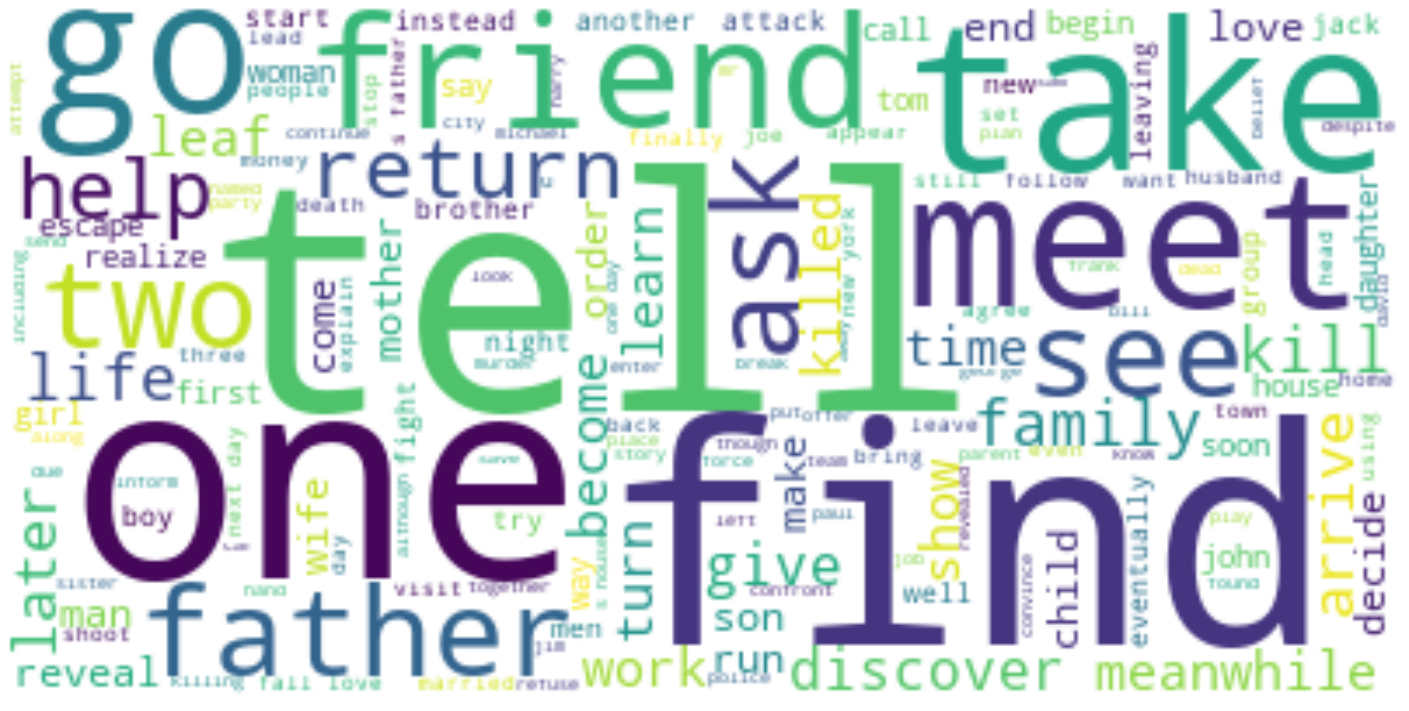

In [20]:
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(25,150))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

####Plotting the distrbution of words for 50 most frequent words excluding the stop words using the ntlk FreqDist

In [21]:
## Storing NLTK English stop word list + conainter for results
stopwords = nltk.corpus.stopwords.words('english')
tokens_stopped = []

## Check if token in stop word list before adding to new list
for word in word_tokenize(text.lower()):
    if word in stopwords:
        pass
    else:
        tokens_stopped.append(word)

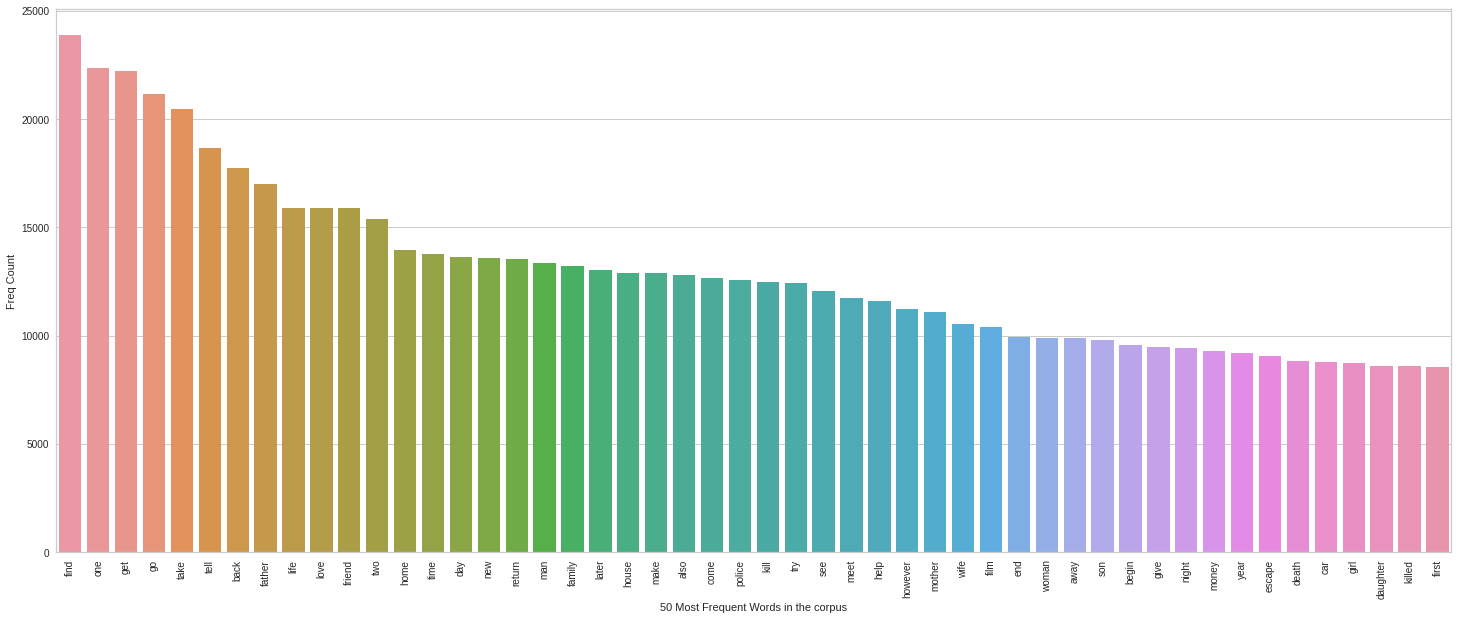

In [136]:
#Plotting the distribution of 50 most frequent words in the corpus
fdist = FreqDist(tokens_stopped).most_common(50)
fdist = pd.Series(dict(fdist))
fig, ax = plt.subplots(figsize=(25,10))
all_plot = sns.barplot(x=fdist.index, y=fdist.values, ax=ax)
plt.xlabel("50 Most Frequent Words in the corpus")
plt.ylabel("Freq Count")
plt.xticks(rotation=90);

#### Checking the proportion of each of the genre in the dataset

In [23]:
genre_prop=pd.DataFrame(df["Genre"].value_counts())
genre_prop["proportion"]=genre_prop["Genre"]/(genre_prop["Genre"].sum())*100
genre_prop.sort_values(by="proportion",ascending=False,inplace=True)
genre_prop

,Genre,proportion
drama,6818,26.156679
comedy,5347,20.513312
action,1952,7.488683
horror,1379,5.290417
crime,1242,4.764828
romance,1188,4.557661
thriller,1048,4.020563
western,922,3.537175
musical,689,2.643290
romantic,634,2.432287


#### Finding the most and least common origin of the movies

In [24]:
#The most and least common origin of the movies in the dataframe
origin_df=pd.DataFrame(df['Origin/Ethnicity'].value_counts())
origin_df.reset_index(inplace=True)
origin_df

,index,Origin/Ethnicity
0,American,16106
1,British,2518
2,Bollywood,1969
3,Telugu,755
4,Tamil,699
5,Japanese,619
6,Canadian,569
7,Malayalam,488
8,Australian,403
9,Chinese,390


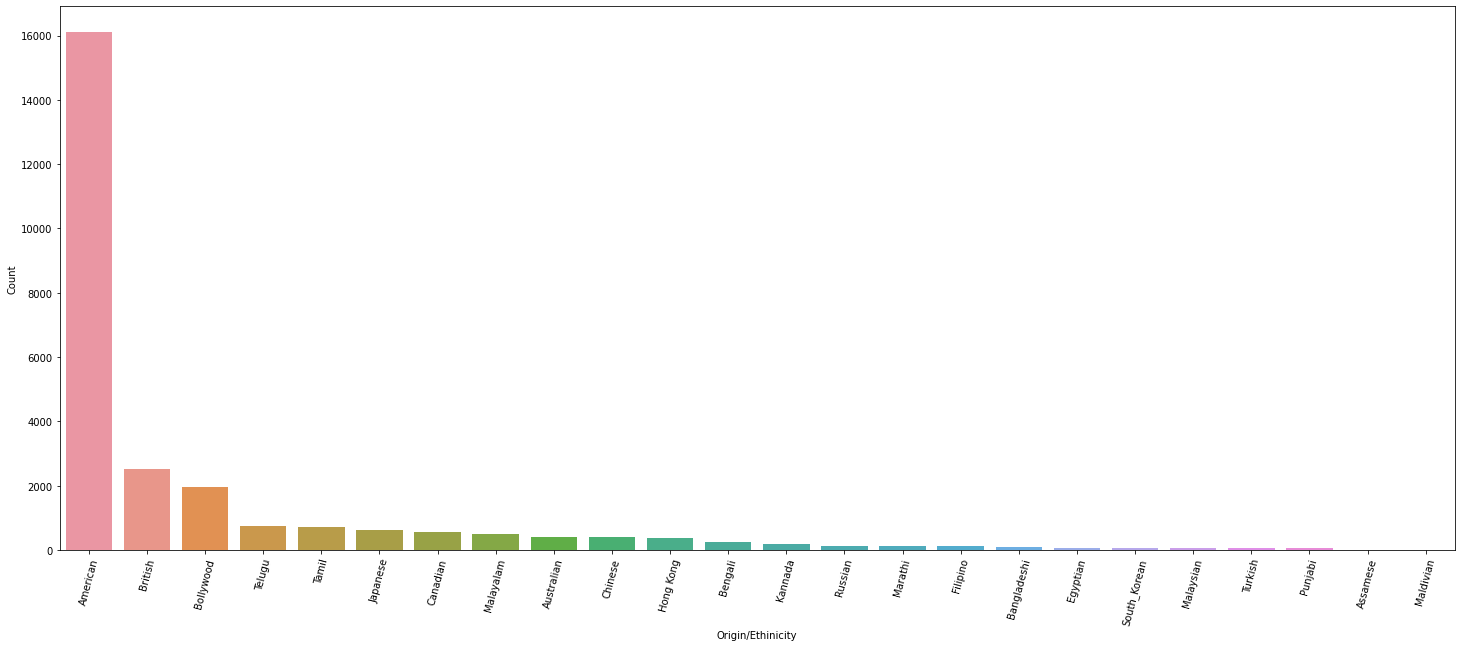

In [25]:
plt.figure(figsize=(25,10))
sns.barplot(x=origin_df["index"],y=origin_df['Origin/Ethnicity'])
plt.xticks(rotation = 75) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel("Origin/Ethinicity")
plt.ylabel("Count")
plt.show()

####What trends can you find in your data?

In [26]:
#Finding the most common genre in each release year
df1 = df.groupby('Release Year')['Genre'].apply(lambda x: x.value_counts().index[0]).reset_index()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df1)

     Release Year    Genre
0            1903  western
1            1904   comedy
2            1907   comedy
3            1908    drama
4            1909    drama
5            1910    drama
6            1911    drama
7            1912    drama
8            1913    drama
9            1914   comedy
10           1915   comedy
11           1916    drama
12           1917   comedy
13           1918    drama
14           1919    drama
15           1920    drama
16           1921    drama
17           1922    drama
18           1923    drama
19           1924    drama
20           1925    drama
21           1926   comedy
22           1927    drama
23           1928    drama
24           1929    drama
25           1930    drama
26           1931    drama
27           1932    drama
28           1933    drama
29           1934    drama
30           1935   comedy
31           1936   comedy
32           1937    drama
33           1938   comedy
34           1939    drama
35           1940   comedy
3

In [27]:
#Whats the most common genre?
df1["Genre"].value_counts()

drama      86
comedy     25
western     1
film        1
Name: Genre, dtype: int64

###2. Genres Selection and Understanding 

#### 2a. Select the following five movie genres (classes): Drama, comedy, adventure,romance, western. Some of the instances in the dataset belong to multiple genres. Be sure to motivate your selection strategy for those cases.


In [28]:
#We have already processed the instances with multiple genres and now we will just filter the dataset for 5 genres
a_list_genre=["drama", "comedy", "adventure",
"romance", "western"]
df=df[df["Genre"].isin(a_list_genre)]


In [29]:
df["Genre"].value_counts() #Printing the filtered dataset

drama        6818
comedy       5347
romance      1188
western       922
adventure     603
Name: Genre, dtype: int64

#### 2b. What is the most frequent word in the title of the movies for each of the genres?


In [30]:
## Function which return text from titles after removing stopwords from them
stopwords = nltk.corpus.stopwords.words('english')

def stopped_words(text):
  title_stopped = []
  for word in word_tokenize(text.lower()):
    if word in stopwords:
        pass
    else:
        title_stopped.append(word.lower())
  return title_stopped

In [31]:
#Preprocessing the titles for extracting the most frequent words in the title
df_drama=df[df["Genre"]=="drama"]
df_comedy=df[df["Genre"]=="comedy"]
df_adventure=df[df["Genre"]=="adventure"]
df_romance=df[df["Genre"]=="romance"]
df_western=df[df["Genre"]=="western"]
df_drama["filtered_title"] = df_drama['Title'].apply(lambda x: re.sub(r'([^\w ]|_|\d)', '', str(x)))
df_comedy["filtered_title"] = df_comedy['Title'].apply(lambda x: re.sub(r'([^\w ]|_|\d)', '', str(x)))
df_adventure["filtered_title"] = df_adventure['Title'].apply(lambda x: re.sub(r'([^\w ]|_|\d)', '', str(x)))
df_romance["filtered_title"] = df_romance['Title'].apply(lambda x: re.sub(r'([^\w ]|_|\d)', '', str(x)))
df_western["filtered_title"] = df_western['Title'].apply(lambda x: re.sub(r'([^\w ]|_|\d)', '', str(x)))
text_drama = " ".join(word for word in df_drama.filtered_title)
text_comedy = " ".join(word for word in df_comedy.filtered_title)
text_adventure = " ".join(word for word in df_adventure.filtered_title)
text_romance = " ".join(word for word in df_romance.filtered_title)
text_western = " ".join(word for word in df_western.filtered_title)

<ipython-input-31-64ce1623f29c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drama["filtered_title"] = df_drama['Title'].apply(lambda x: re.sub(r'([^\w ]|_|\d)', '', str(x)))
<ipython-input-31-64ce1623f29c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comedy["filtered_title"] = df_comedy['Title'].apply(lambda x: re.sub(r'([^\w ]|_|\d)', '', str(x)))
<ipython-input-31-64ce1623f29c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

#####Plotting Most Frequent words for titles of drama genre

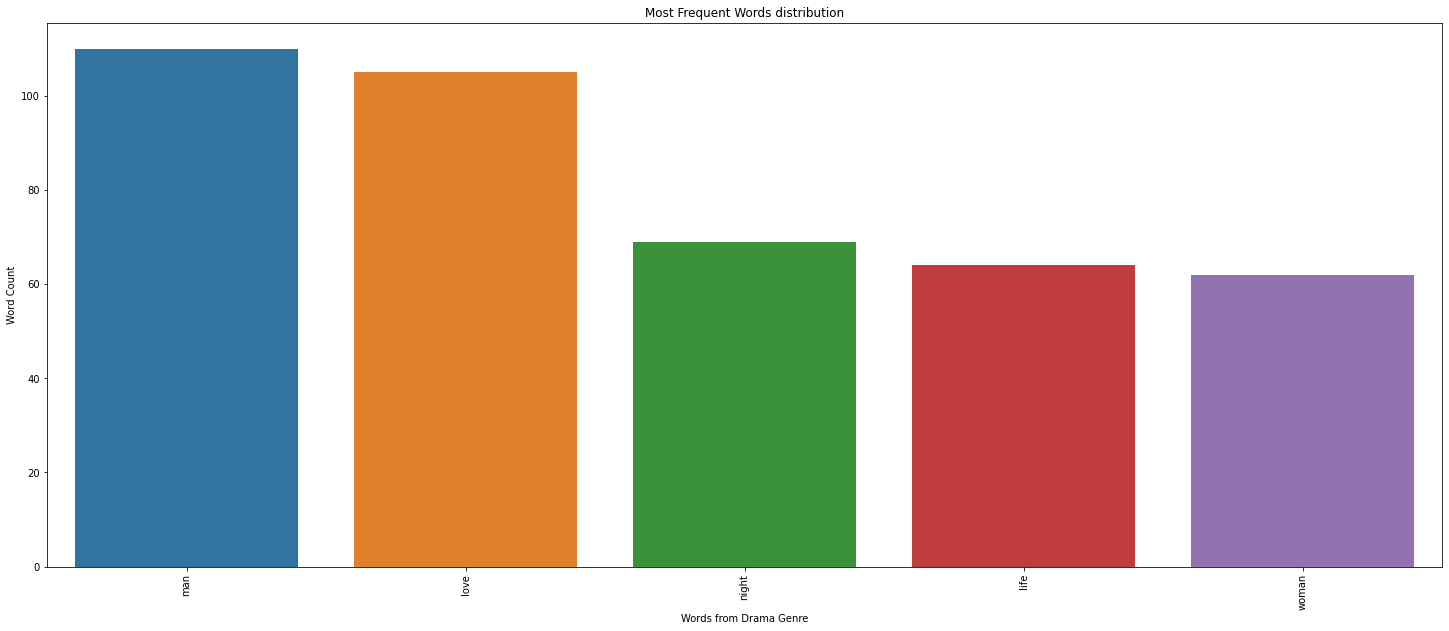

In [32]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = FreqDist(stopped_words(text_drama)).most_common(5)
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(25,10))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xlabel("Words from Drama Genre")
plt.ylabel("Word Count")
plt.title("Most Frequent Words distribution")
plt.xticks(rotation=90);

#####Plotting Most Frequent words for titles of comedy genre

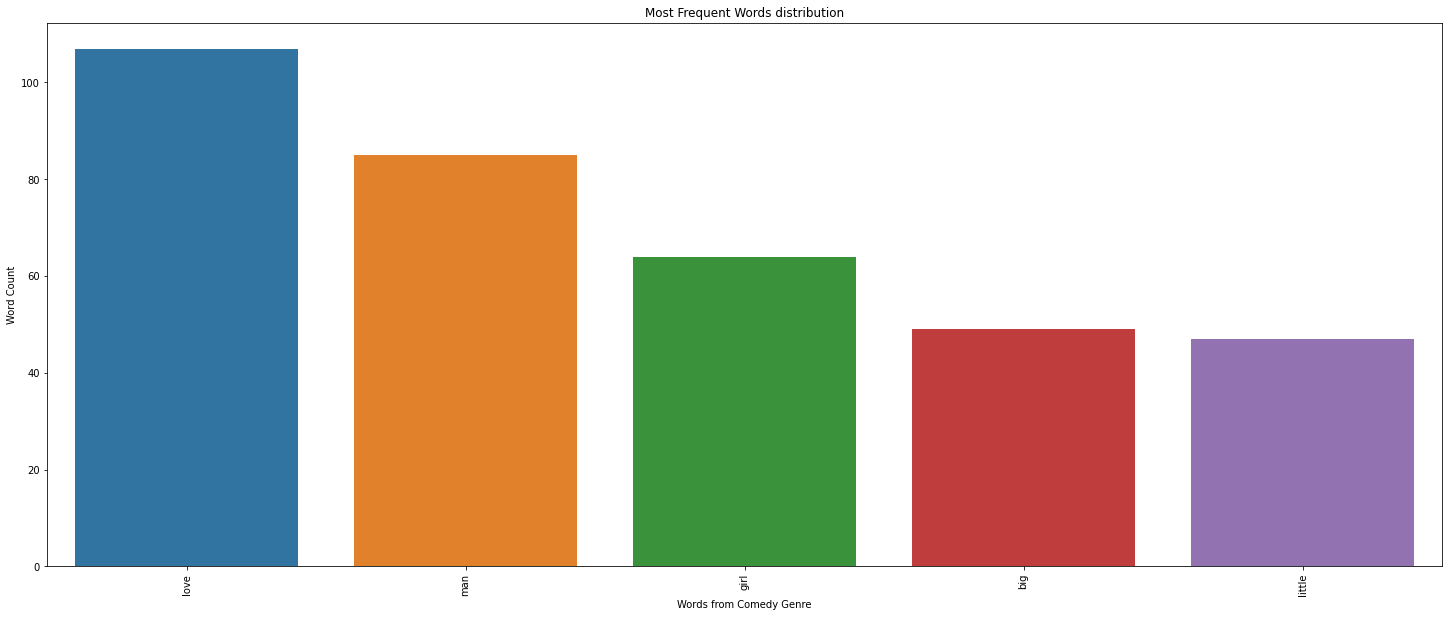

In [33]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = FreqDist(stopped_words(text_comedy)).most_common(5)
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(25,10))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xlabel("Words from Comedy Genre")
plt.ylabel("Word Count")
plt.title("Most Frequent Words distribution")
plt.xticks(rotation=90);

#####Plotting Most Frequent words for titles of adventure genre

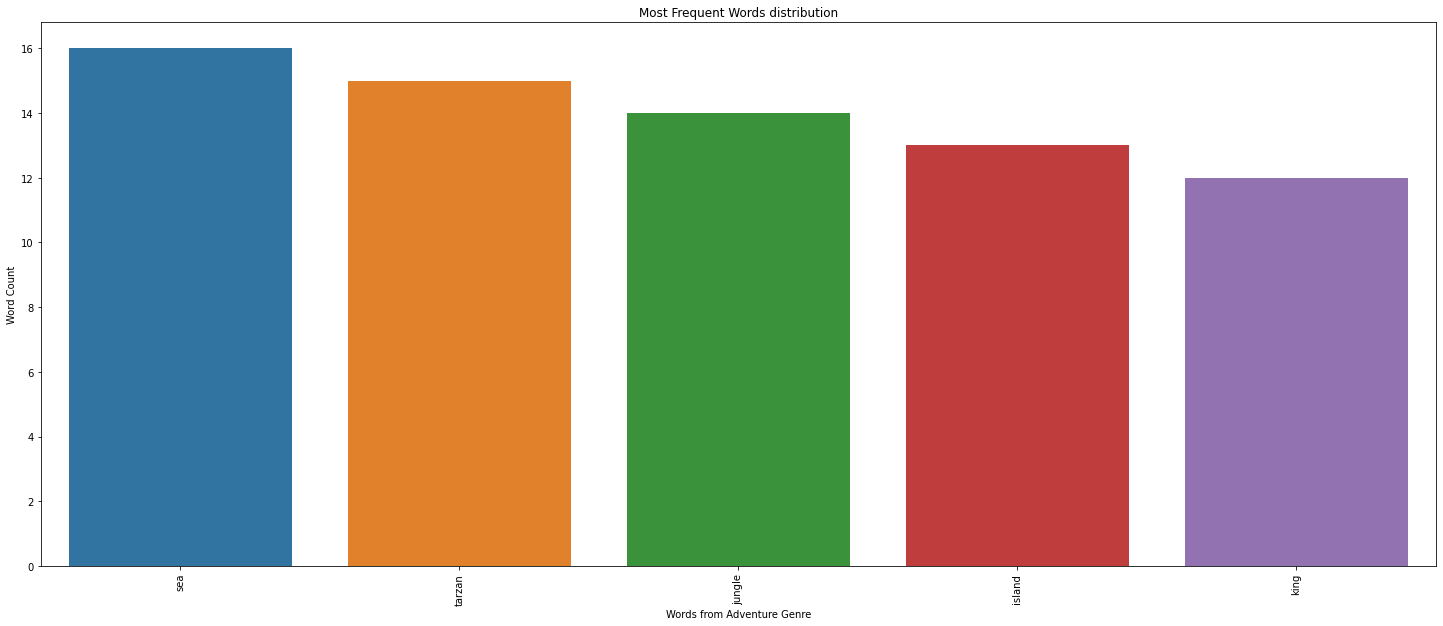

In [34]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
fdist = FreqDist(stopped_words(text_adventure)).most_common(5)
fdist = pd.Series(dict(fdist))
fig, ax = plt.subplots(figsize=(25,10))
all_plot = sns.barplot(x=fdist.index, y=fdist.values, ax=ax)
plt.xlabel("Words from Adventure Genre")
plt.ylabel("Word Count")
plt.title("Most Frequent Words distribution")
plt.xticks(rotation=90);

#####Plotting Most Frequent words for titles of romance genre

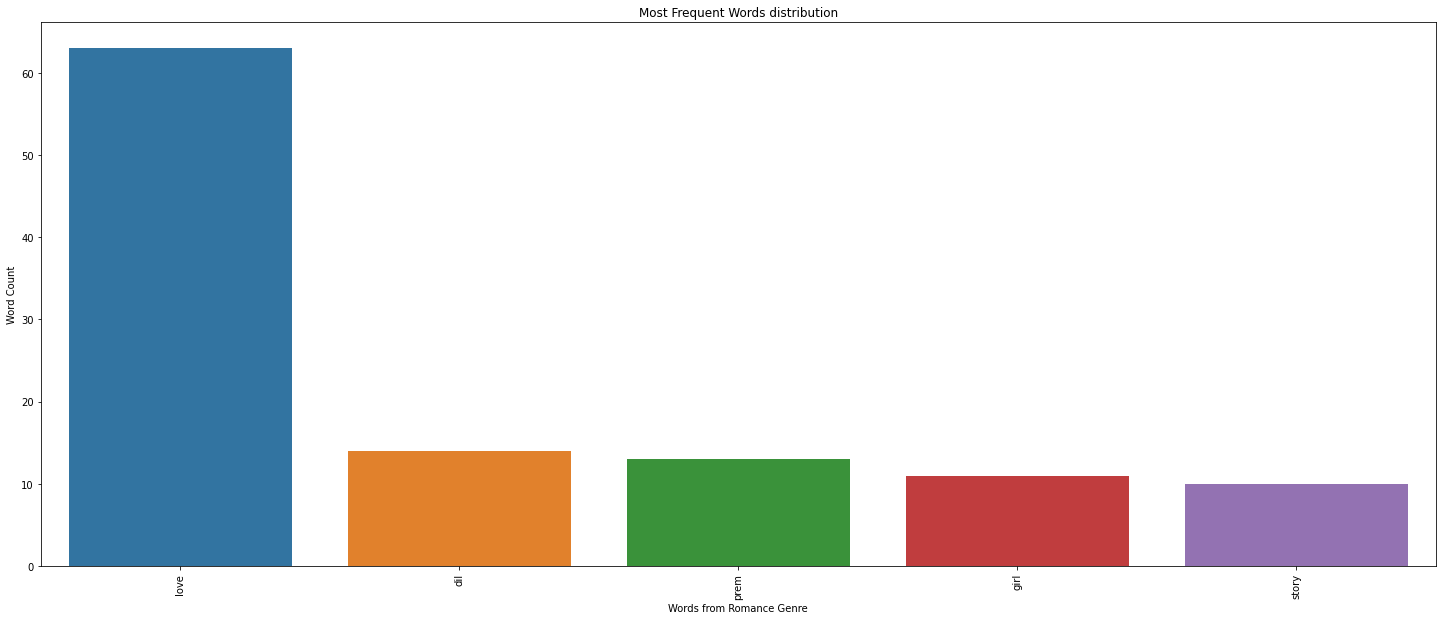

In [35]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = FreqDist(stopped_words(text_romance)).most_common(5)
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(25,10))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xlabel("Words from Romance Genre")
plt.ylabel("Word Count")
plt.title("Most Frequent Words distribution")
plt.xticks(rotation=90);

#####Plotting Most Frequent words for titles of western genre

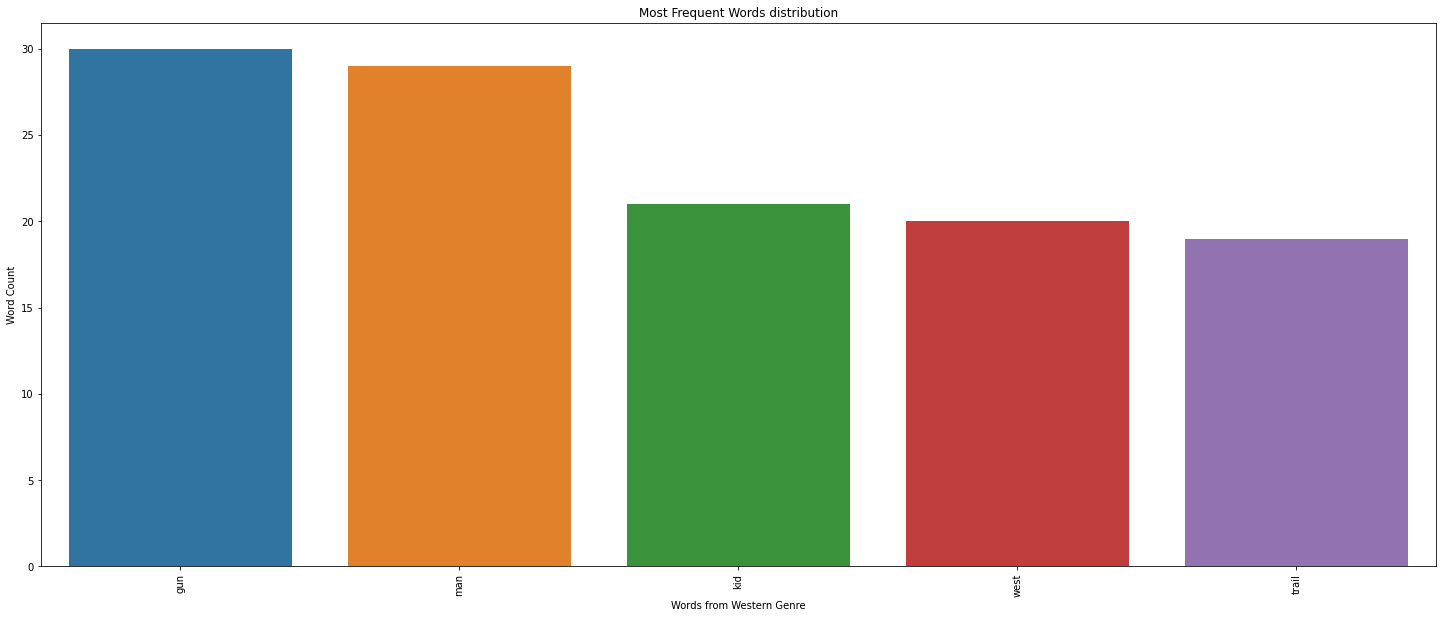

In [36]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = FreqDist(stopped_words(text_western)).most_common(5)
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(25,10))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xlabel("Words from Western Genre")
plt.ylabel("Word Count")
plt.title("Most Frequent Words distribution")
plt.xticks(rotation=90);

#### 2c.) What is the distribution of words of the plot description between the genres?

In [37]:
print("Word Distribution of Drama Genres:",FreqDist(stopped_words(text_drama)).most_common())
print("Word Distribution of Comedy Genres:",FreqDist(stopped_words(text_comedy)).most_common())
print("Word Distribution of Adventure Genres:",FreqDist(stopped_words(text_adventure)).most_common())
print("Word Distribution of Romance Genres:",FreqDist(stopped_words(text_romance)).most_common())
print("Word Distribution of Western Genres:",FreqDist(stopped_words(text_western)).most_common())

Word Distribution of Drama Genres: [('man', 110), ('love', 105), ('night', 69), ('life', 64), ('woman', 62), ('girl', 54), ('heart', 45), ('day', 45), ('little', 41), ('last', 41), ('lady', 40), ('men', 39), ('city', 36), ('white', 36), ('big', 36), ('one', 36), ('story', 36), ('black', 32), ('house', 32), ('young', 31), ('two', 30), ('road', 30), ('world', 30), ('street', 29), ('wild', 28), ('mr', 28), ('home', 27), ('women', 27), ('lost', 26), ('red', 26), ('boy', 26), ('back', 25), ('great', 23), ('secret', 23), ('time', 23), ('high', 23), ('boys', 23), ('angel', 22), ('girls', 21), ('thethe', 21), ('dark', 20), ('end', 20), ('three', 20), ('heaven', 20), ('days', 20), ('blue', 20), ('new', 19), ('american', 19), ('good', 19), ('come', 18), ('never', 18), ('king', 18), ('town', 18), ('summer', 18), ('four', 17), ('without', 17), ('war', 17), ('island', 17), ('way', 16), ('moon', 16), ('paradise', 16), ('bad', 16), ('mrs', 16), ('song', 16), ('tale', 15), ('place', 15), ('family', 15

#### 2c.) Calculate vocabulary alignments between the genres. Vocabularies alignment is defined as the percentage of the top 1000 most frequent words from one corpus present in the top 1000 most frequent words of another corpus.


In [38]:
text_drama = " ".join(word for word in df_drama.filtered_sentence)
text_comedy = " ".join(word for word in df_comedy.filtered_sentence)
text_adventure = " ".join(word for word in df_adventure.filtered_sentence)
text_romance = " ".join(word for word in df_romance.filtered_sentence)
text_western = " ".join(word for word in df_western.filtered_sentence)

In [39]:
drama=(pd.DataFrame(FreqDist(stopped_words(text_drama)).most_common(1000)))[0]
comedy=(pd.DataFrame(FreqDist(stopped_words(text_comedy)).most_common(1000)))[0]
adventure=(pd.DataFrame(FreqDist(stopped_words(text_adventure)).most_common(1000)))[0]
romance=(pd.DataFrame(FreqDist(stopped_words(text_romance)).most_common(1000)))[0]
western=(pd.DataFrame(FreqDist(stopped_words(text_western)).most_common(1000)))[0]

In [40]:
genres_sel=["drama","comedy","adventure","romance","western"]
for i in list(itertools.combinations(genres_sel,2)):
  a=pd.Series((eval(i[0])))
  b=pd.Series((eval(i[1])))
  print("Vocablury Alignment between : "+ i[0] +" and "+ i[1] +" is = ",len(a[a.isin(b)])/1000*100,"%")

Vocablury Alignment between : drama and comedy is =  83.39999999999999 %
Vocablury Alignment between : drama and adventure is =  64.1 %
Vocablury Alignment between : drama and romance is =  72.8 %
Vocablury Alignment between : drama and western is =  61.199999999999996 %
Vocablury Alignment between : comedy and adventure is =  62.5 %
Vocablury Alignment between : comedy and romance is =  68.30000000000001 %
Vocablury Alignment between : comedy and western is =  60.6 %
Vocablury Alignment between : adventure and romance is =  51.800000000000004 %
Vocablury Alignment between : adventure and western is =  60.099999999999994 %
Vocablury Alignment between : romance and western is =  49.9 %


###3. Text normalization and feature engineering (0.1)

####a. Remove stop words

In [41]:
# Print all english stopwords according to nltk
from nltk.corpus import stopwords 
filtered_sent = []
stop_words = set(stopwords.words('english')) 
for i in df["Plot"]:
  word_tokens = word_tokenize(i) 
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  filtered_sent.append(filtered_sentence)
df["filtered_sentence"] = filtered_sent

#### b. Remove numbers and other non-letter characters

In [42]:
df["filtered_sentence"] = df['filtered_sentence'].apply(lambda x: re.sub(r'([^\w ]|_|\d)', '', str(x)))

#### c. Perform either lemmatization or stemming. Motivate your choice

In [79]:
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  lemmatize_data = []
  data = []
  for s in text:
    tokenization = word_tokenize(s) 
    for i in range(len(tokenization)):
        tokenization[i] = lemmatizer.lemmatize(tokenization[i])
    token = ' '.join(tokenization)
    lemmatize_data.append(token)
    #print(tokenization)
    #   #  token1 = ' '.join(tokenization)
    #    data.append(lemmatize_data[i])
  return lemmatize_data

####We chose to go with lemmatization as it retains the context and meaning of the word, for e.g. Lemmatization of changing, changes, changed would be change. Whereas stemming will only remove the suffixes such as ing, es, ed, etc. For e.g. changing, changes, changed in stemming would be chang. Stemming generates word with no meaning.

In [80]:
lemmatized_text = lemmatize(df["filtered_sentence"])
df["lemmatized_text"]=lemmatized_text


#### d. Convert the corpus into a bag-of-words tf-idf weighted vector representation.


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer()
# Transform features into tfidf representation
X_tfidf = vectorizer.fit_transform(df["lemmatized_text"])
y = df["Genre"]

### 4. Build a model to predict movie genres.

#### a. Explain what is the task you’re solving (e.g., supervised or unsupervised, classification or regression or clustering or similarity matching etc)
##### Since our Task is to make multiclass predictive classification model. So we would be going with the family of supervised classifcation models which supports multiclass classfication. and Our dataset is heavily imbalanced so we will go with classifiers which supports multiclass classification and works well with imbalanced data. 
##### For our current problem we are choosing baggingclassifier because of computational constraints 

####4b.) Use a feature selection method to select the features to build a model.


####Splitting the dataset into train and text sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.33, random_state=42
)


In [ ]:
from sklearn.decomposition import SparsePCA 
sparse_pca = SparsePCA()
sparse_pca_data_points = pca.fit_transform(X_train.todense())
explained_variance = pca.explained_variance_ratio_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA 
pca = PCA()
pca_data_points = pca.fit_transform(X_train.todense())
explained_variance = pca.explained_variance_ratio_

#### Since we have got many input features, we tried with simple PCA first, but it doesnt have support for parse matrix, and then we tried to use SparsePCA and when applying the todense function, Google colab keeps crashing because of less ram. so we will skip with the feature selection for current modelling.

####Q4
####b. Use a feature selection method to select the features to build a model.
####c. Select the evaluation metric. Justify your choice.
####d. Perform hyperparameter tuning if applicable.
####e. Train and evaluate your model. Report the confusion matrix.

Since our task is multiclass classification and the dataset is heavily imbalanced so we will not use accuracy metric and instead we will use macro f1 score for the scoring as well as during evaluating the model.

In [62]:
#Training a BaggingClassifier Model
bg_model=BaggingClassifier(n_jobs=-1)
bg_model.fit(X_train,y_train)
bg_predicitions=bg_model.predict(X_test)
bg_score=f1_score(bg_predicitions,y_test.values.ravel(),average="macro")
print("f1_score_macro:",bg_score)
pd.DataFrame(classification_report(y_test.values.ravel(),bg_predicitions, output_dict=True)).T

f1_score_macro: 0.4227430831398413


,precision,recall,f1-score,support
adventure,0.529412,0.086124,0.148148,209.000000
comedy,0.542872,0.572964,0.557512,1768.000000
drama,0.559471,0.691784,0.618632,2203.000000
romance,0.526316,0.095923,0.162272,417.000000
western,0.780952,0.523962,0.627151,313.000000
accuracy,0.561914,0.561914,0.561914,0.561914
macro avg,0.587805,0.394151,0.422743,4910.000000
weighted avg,0.563518,0.561914,0.538382,4910.000000


In [65]:
#Parameter Tuning for Bagging Classifier Model using GridSearhCV from Sklearn
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')
parameters = {'max_samples' : [0.05, 0.1, 0.2, 0.5]}
bg_model=BaggingClassifier(n_jobs=-1)
bg_grid=GridSearchCV(bg_model,parameters,n_jobs=-1,scoring=f1)
bg_grid.fit(X_train, y_train.values.ravel())
bg_grid_predictions = bg_grid.predict(X_test)
print(bg_grid.best_params_)
print(classification_report(y_test, bg_grid_predictions)) 

{'max_samples': 0.5}
              precision    recall  f1-score   support

   adventure       0.59      0.06      0.11       209
      comedy       0.53      0.56      0.55      1768
       drama       0.56      0.70      0.62      2203
     romance       0.38      0.06      0.11       417
     western       0.83      0.58      0.69       313

    accuracy                           0.56      4910
   macro avg       0.58      0.39      0.42      4910
weighted avg       0.55      0.56      0.53      4910



####4f.) How do you make sure not to overfit?
#####Ans.) The following steps could be taken to make sure that model does not overfit.
1.) Adding regularisation parameters

2.) Using Simpler models to make sure that the model is not training on noise.

3.) Complex models can be used with Dropouts

4.) We can also use early stopping


####4.)
g. Plot learning curve

h. Analyze the results

In [66]:
#Plotting Learning Curve
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):

    _, axes = plt.subplots(1, 4, figsize=(30, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
        scoring="f1_macro",
    )
    #print(score_times)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    # Plot score_time vs score
    axes[3].grid()
    axes[3].plot(train_sizes*0.2, score_times_mean, "o-")
    axes[3].fill_between(
        train_sizes*0.2,
        score_times_mean - score_times_std,
        score_times_mean + score_times_std,
        alpha=0.1,
    )
    axes[3].set_xlabel("Scoring examples")
    axes[3].set_ylabel("Prediction_Timing")
    axes[3].set_title("Scoring Time")
    return plt

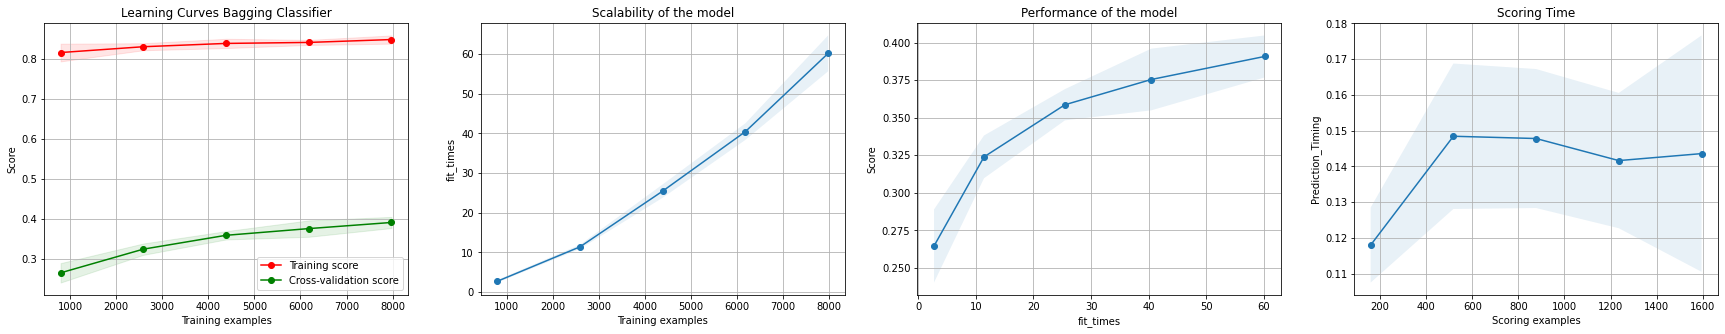

In [69]:
#Making Learning Curves for Bagging Classifier  with n_jobs set to 1
title = "Learning Curves Bagging Classifier"
train_sizes = np.linspace(0.1, 1.0, 10)

estimator = BaggingClassifier(max_samples=0.5)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(estimator, title, X_train, y_train.values.ravel(), cv=cv, n_jobs=1)

plt.show()

#### We see that for our dataset, the training score remains upwards of 80% however the training scores remain low. But when the training examples, the cross validation starts to increase. 
#### Scalablity of the model looks almost look linear from the above plot which and the performance also increases with training however it starts to show the signs of plateauing but we need further training and evaluation to have the actual picture of this. The scoring time was initially low and stays on the similar level even after increasing the training examples

####Q5.)5. Apply part-of-speech tagging (0.1)
####a. Filter the text to only retain the nouns and repeat Q3 and Q4; see nltk.tag for description on part-of-speech tagging in python.
####b. Discuss the advantages (or, disadvantages thereof) of using the nouns only in representing the text by comparing and contrasting the results you obtained in Q4 and Q5(a).

In [85]:
def get_nouns(row):
  nouns = []
  for index, tuple in enumerate(row):
    noun = tuple[0]
    tag = tuple[1]
    if tag.startswith("N"):
      nouns.append(noun)
  return " ".join(nouns)

In [86]:
from nltk import pos_tag, pos_tag_sents
sent_token = df['lemmatized_text'].apply(word_tokenize)
tags = nltk.pos_tag_sents(sent_token)

In [87]:
df["pos_tags"] = tags 
df["noun_text"] = df['pos_tags'].apply(lambda x: get_nouns(x)) 

In [88]:
df["noun_text"].dropna(inplace=True)

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer()
# Transform features into tfidf representation
x_noun_tfidf = vectorizer.fit_transform(df["noun_text"])
y = df["Genre"]

In [90]:
X_train_noun, X_test_noun, y_train_noun, y_test_noun = train_test_split(
    x_noun_tfidf, y, test_size=0.33, random_state=42
)

In [135]:
#Parameter Tuning for Bagging Classifier Model using GridSearhCV from Sklearn
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')
parameters = {'max_samples' : [0.05, 0.1, 0.2, 0.5]}
bg_model=BaggingClassifier(n_jobs=-1)
bg_grid=GridSearchCV(bg_model,parameters,n_jobs=-1,scoring=f1)
bg_grid.fit(X_train_noun, y_train_noun.values.ravel())
bg_grid_predictions = bg_grid.predict(X_test_noun)
print(bg_grid.best_params_)
print(classification_report(y_test, bg_grid_predictions)) 

{'max_samples': 0.5}
              precision    recall  f1-score   support

   adventure       0.54      0.07      0.13       209
      comedy       0.51      0.54      0.52      1768
       drama       0.55      0.69      0.61      2203
     romance       0.50      0.04      0.08       417
     western       0.75      0.55      0.63       313

    accuracy                           0.54      4910
   macro avg       0.57      0.38      0.39      4910
weighted avg       0.54      0.54      0.51      4910



#### We observe that by filtering the text for noun with the help of part of speech tagging reduces both the macro as well the weighted avg accuracy of the model. The reason for which could be that we reducing the information available for modelling and since the dataset is not huge so we hypothesize that maybe because of small dataset, applying POS is removing the necessary information from the dataset thus should be avoided when dealing with limited dataset

####Q6)Apply K-means Clustering algorithm (0.2)
####a. Apply K-means clustering on the same dataset using the better of the two representations (from Q4 and Q5) with k = number of genres. Experiment with different initializations, and evaluate the quality of the resulting  clusterings against the ground truth (the known genre of each movie).
####c. Discuss how well clustering can reproduce the classes of the dataset.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

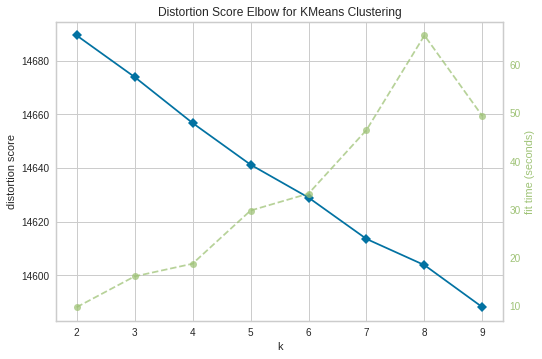

In [84]:
#install yellowbrick to vizualize the Elbow curve
!pip install yellowbrick  

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load the IRIS dataset
iris = datasets.load_iris()
X = X_tfidf

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#####Since we filtered the data on the basis 5 genres and the Kmeans elbow method is showing that optimum number clusters is 6 so the Kmeans clustering is working fine on our dataset.

In [133]:
n_clusters = 6
kmeans = KMeans(n_clusters= n_clusters, max_iter=400, algorithm = 'auto')# Partition 'n' no. of observations into 'k' no. of clusters. 
fitted = kmeans.fit(X_tfidf) # Fitting k-means model  to feature array
prediction = kmeans.predict(X_tfidf) # predicting clusters class '0' or '1' corresponding to 'n' no. of observations

In [ ]:
def kmeans_clustering(Y_sklearn, fitted):
    """
    This function will predict clusters on training set and plot the visuals of clusters as well.
    """

    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis') # Plotting scatter plot 
    centers2 = fitted.cluster_centers_ # It will give best possible coordinates of cluster center after fitting k-means
    plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);
    # As this can be seen from the figure, there is an outlier as well.
kmeans_clustering(X_tfidf, fitted)

In [ ]:
plt.scatter(X_tfidf[:,1], df["Genre"], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#### We see that kmeans works very well when we initialze it with n_clusters = 6 thus we conclude that this unsupervised method works quite well for predicting genres and further tuning with data as well model would result in better predictions

### References:

1. https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
2. https://scikit-learn.org/stable/index.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
4. https://seaborn.pydata.org/
5. https://www.nltk.org/
6. https://realpython.com/nltk-nlp-python/
7. https://towardsdatascience.com/7-nlp-techniques-you-can-easily-implement-with-python-dc0ade1a53c2
8. https://www.analyticsvidhya.com/blog/2021/07/getting-started-with-natural-language-processing-using-python/